In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/data.csv'
data = pd.read_csv(file_path)

# Show basic info and head of the dataset to understand its structure
print("Data Info:")
data.info()

print("\nFirst 5 rows:")
print(data.head())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB

First 5 rows:
                                                URLs  \
0  http://www.bbc.com/news/world-us-canada-414191...   
1  https://www.reuters.com/article/us-filmfestiva...   
2  https://www.nytimes.com/2017/10/09/us/politics...   
3  https://www.reuters.com/article/us-mexico-oil-...   
4  http://www.cnn.com/videos/cnnmoney/2017/10/08/...   

                                            Headline  \
0         Four ways Bob Corker skewered Donald Trump   
1  Linklater's war veteran comedy speaks to moder...   
2  Trump’s Fight With Corker Jeopardizes His Legi...   
3  Egypt's Cheiron wins tie

#**Exploratory Data Analysis (EDA)**

# Data Preprocessing

Check for missing values

In [ ]:
print("\nMissing values in each column:")
print(data.isnull().sum())

# Option 1: Drop rows with missing values
data_cleaned = data.dropna()  # Drop rows with any null values
# OR Option 2: Fill missing values with a placeholder (e.g., empty string or mean for numerical data)
# data_cleaned = data.fillna('')

print("\nData shape after handling missing values:", data_cleaned.shape)



Missing values in each column:
URLs         0
Headline     0
Body        21
Label        0
dtype: int64

Data shape after handling missing values: (3988, 4)


Check for duplicates

In [ ]:
print("\nNumber of duplicate rows:", data_cleaned.duplicated().sum())

# Remove duplicates
data_cleaned = data_cleaned.drop_duplicates()
print("Data shape after removing duplicates:", data_cleaned.shape)



Number of duplicate rows: 0
Data shape after removing duplicates: (3988, 4)


Data Cleaning (Text Processing)

In [ ]:
import pandas as pd
import string

data_cleaned = data.dropna()

# Manually defining common English stopwords
common_stopwords = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your',
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it',
    "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
    'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
    'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while',
    'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above',
    'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
    'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
    'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don',
    "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn',
    "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn',
    "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn',
    "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
])

# Function to clean text manually
def manual_clean_text(text):
    text = text.lower()  # Lowercasing
    text = "".join([char for char in text if char not in string.punctuation])  # Removing punctuation
    text = " ".join([word for word in text.split() if word not in common_stopwords])  # Removing stopwords
    return text

# Apply the cleaning function to the 'Headline' and 'Body' columns
data_cleaned['cleaned_headline'] = data_cleaned['Headline'].apply(manual_clean_text)
data_cleaned['cleaned_body'] = data_cleaned['Body'].apply(manual_clean_text)

# Display the first few rows of the cleaned data
print(data_cleaned.head())

# Save cleaned data if needed
data_cleaned.to_csv('/content/cleaned_dataset.csv', index=False)


<ipython-input-4-a725ba41089e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['cleaned_headline'] = data_cleaned['Headline'].apply(manual_clean_text)
<ipython-input-4-a725ba41089e>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['cleaned_body'] = data_cleaned['Body'].apply(manual_clean_text)


                                                URLs  \
0  http://www.bbc.com/news/world-us-canada-414191...   
1  https://www.reuters.com/article/us-filmfestiva...   
2  https://www.nytimes.com/2017/10/09/us/politics...   
3  https://www.reuters.com/article/us-mexico-oil-...   
4  http://www.cnn.com/videos/cnnmoney/2017/10/08/...   

                                            Headline  \
0         Four ways Bob Corker skewered Donald Trump   
1  Linklater's war veteran comedy speaks to moder...   
2  Trump’s Fight With Corker Jeopardizes His Legi...   
3  Egypt's Cheiron wins tie-up with Pemex for Mex...   
4        Jason Aldean opens 'SNL' with Vegas tribute   

                                                Body  Label  \
0  Image copyright Getty Images\nOn Sunday mornin...      1   
1  LONDON (Reuters) - “Last Flag Flying”, a comed...      1   
2  The feud broke into public view last week when...      1   
3  MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...      1   
4  Country 

In [ ]:
print(data_cleaned.columns)

Index(['URLs', 'Headline', 'Body', 'Label', 'cleaned_headline',
       'cleaned_body'],
      dtype='object')


# Data Visualization

Distribution of Classes (Fake vs. Real)

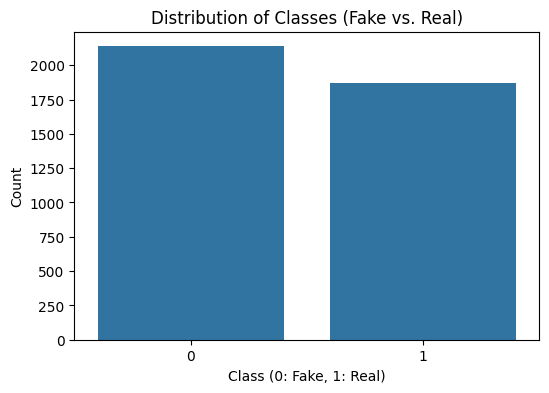

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the 'Label' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=data)
plt.title('Distribution of Classes (Fake vs. Real)')
plt.xlabel('Class (0: Fake, 1: Real)')
plt.ylabel('Count')
plt.show()


 Word Count Distribution (for the cleaned_body column)

<ipython-input-9-6e3e2b438b49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['word_count'] = data_cleaned['cleaned_body'].apply(lambda x: len(x.split()))


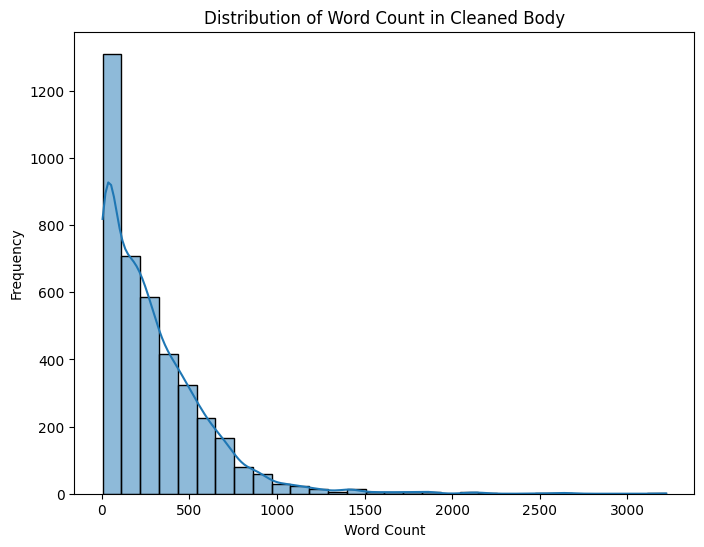

In [ ]:
# Adding a column with word counts
data_cleaned['word_count'] = data_cleaned['cleaned_body'].apply(lambda x: len(x.split()))

# Plotting the distribution of word counts
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['word_count'], bins=30, kde=True)
plt.title('Distribution of Word Count in Cleaned Body')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


Word Count Distribution (for cleaned_headline and cleaned_body columns)

<ipython-input-10-95992fb1bf55>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['headline_length'] = data_cleaned['cleaned_headline'].apply(lambda x: len(x.split()))
<ipython-input-10-95992fb1bf55>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['body_length'] = data_cleaned['cleaned_body'].apply(lambda x: len(x.split()))


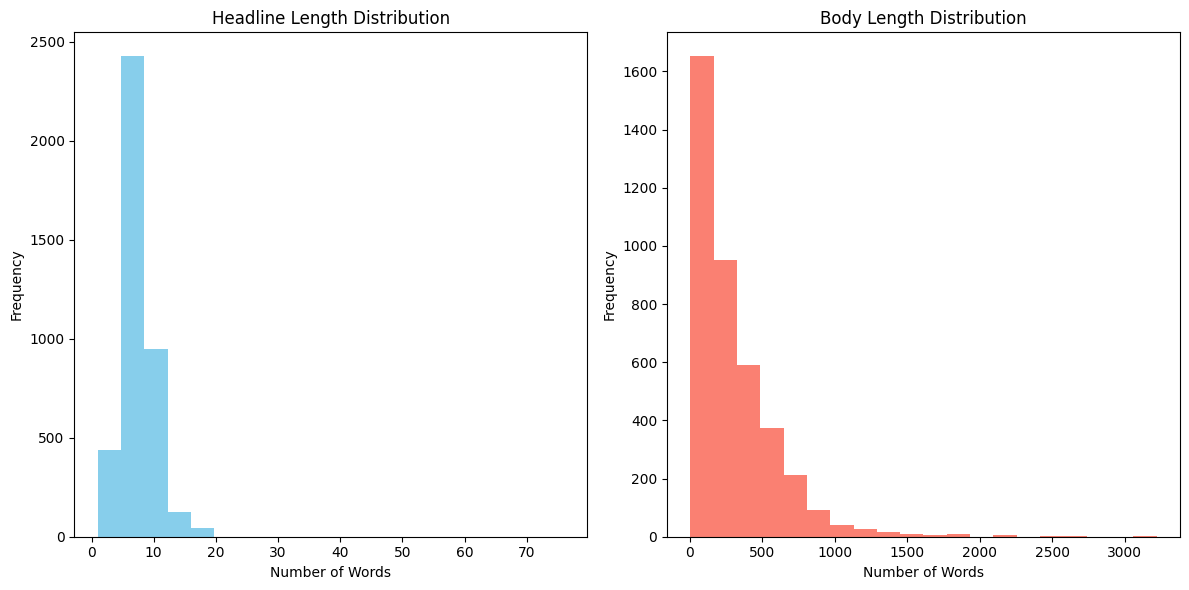

In [ ]:
import matplotlib.pyplot as plt

# Calculate word count for cleaned titles and text
data_cleaned['headline_length'] = data_cleaned['cleaned_headline'].apply(lambda x: len(x.split()))
data_cleaned['body_length'] = data_cleaned['cleaned_body'].apply(lambda x: len(x.split()))

# Plot the distribution of title and text lengths
plt.figure(figsize=(12, 6))

# Title length distribution
plt.subplot(1, 2, 1)
plt.hist(data_cleaned['headline_length'], bins=20, color='skyblue')
plt.title('Headline Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Text length distribution
plt.subplot(1, 2, 2)
plt.hist(data_cleaned['body_length'], bins=20, color='salmon')
plt.title('Body Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Pair Plot (Visualizing Pairwise Relationships Between Features)

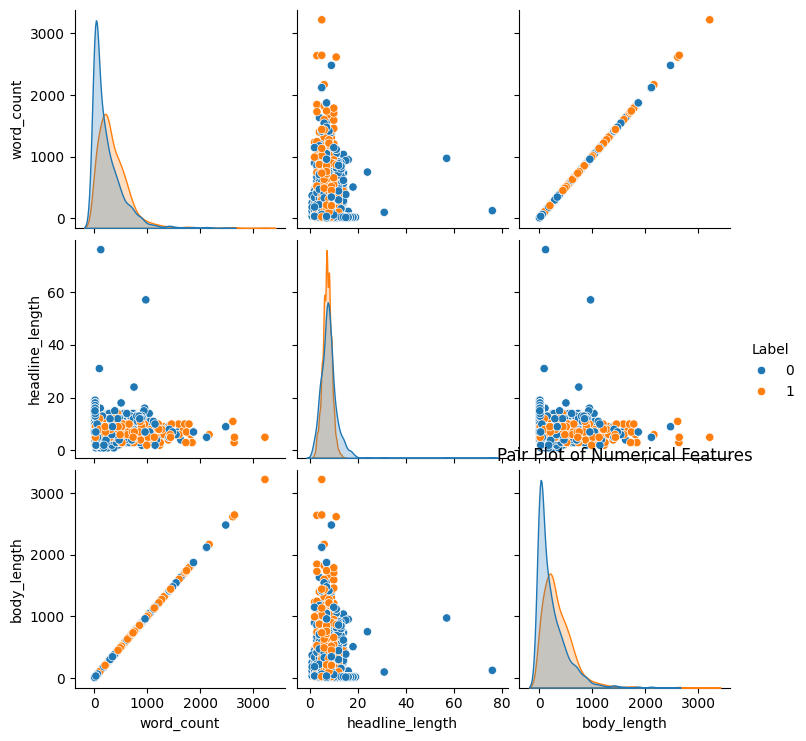

In [ ]:
# If you have numerical features in your dataset
# Example for visualizing numerical feature correlations with a target variable
sns.pairplot(data_cleaned, hue='Label')
plt.title('Pair Plot of Numerical Features')
plt.show()


Heatmap of Correlation Matrix (To Identify Correlations Between Numerical Features)

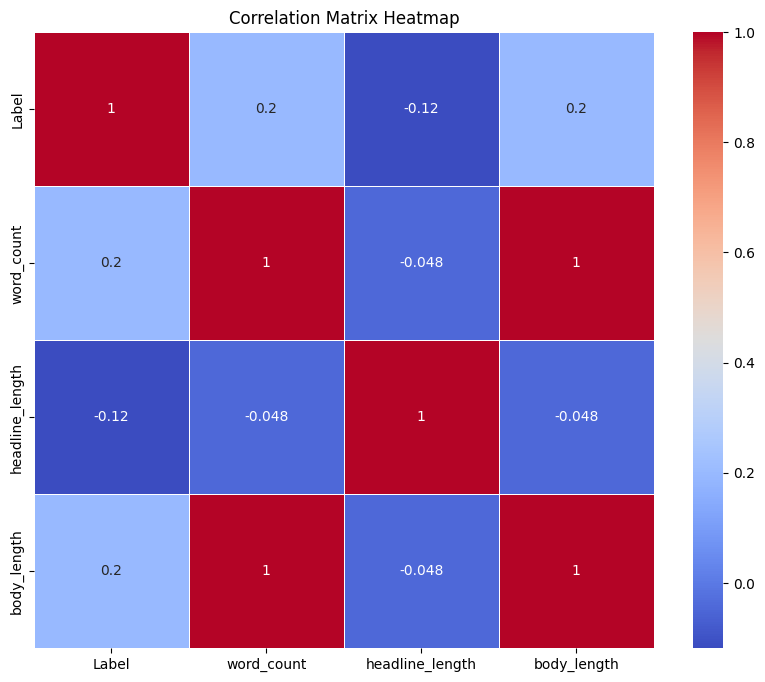

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Check if the numeric data is empty
if not numeric_columns.empty:
    # Correlation matrix
    plt.figure(figsize=(10, 8))
    corr_matrix = numeric_columns.corr()

    # Plotting the heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix Heatmap')
    plt.show()
else:
    print("No numeric columns available for correlation.")


 Bar Plot (Top 20 Most Frequent Words)

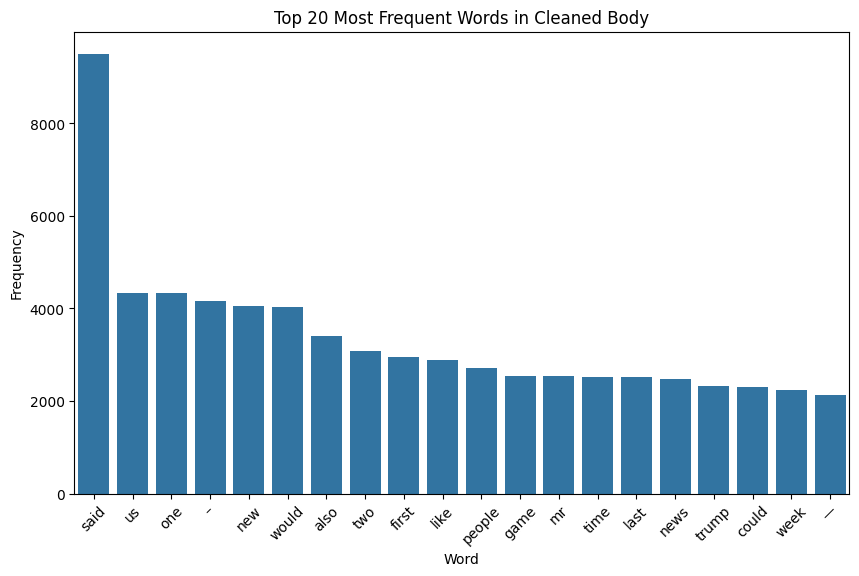

In [ ]:
from collections import Counter

# Get all the words in the cleaned text
all_words = " ".join(data_cleaned['cleaned_body']).split()

# Get the 20 most common words
word_freq = Counter(all_words).most_common(20)

# Convert to DataFrame for easier plotting
word_freq_df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])

# Plotting the most common words
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=word_freq_df)
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Words in Cleaned Body')
plt.show()


Box Plot (Distribution of Word Count Based on Class)

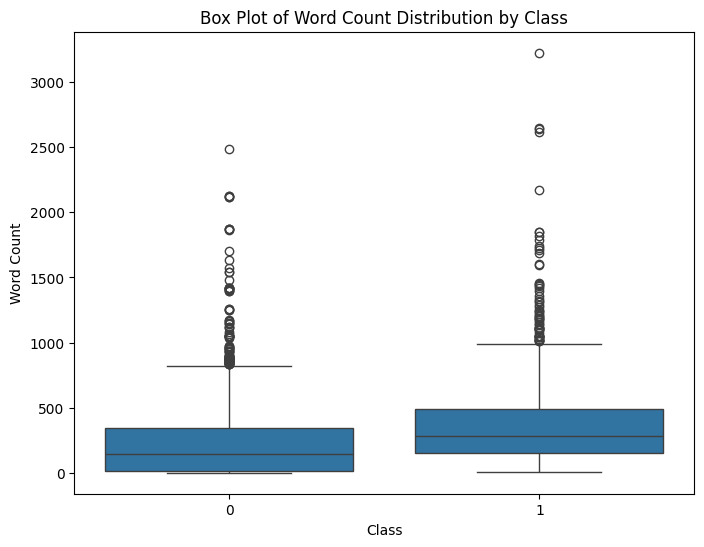

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Label', y='word_count', data=data_cleaned)
plt.title('Box Plot of Word Count Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Word Count')
plt.show()


Word Cloud

In [ ]:
from collections import Counter

# Find most frequent words in cleaned titles and text
title_words = " ".join(data_cleaned['cleaned_headline']).split()
text_words = " ".join(data_cleaned['cleaned_body']).split()

# Get the 10 most common words in titles and text
most_common_headline_words = Counter(title_words).most_common(10)
most_common_body_words = Counter(text_words).most_common(10)

# Display the most common words
print("Most Common Words in Headlines:", most_common_headline_words)
print("Most Common Words in Body", most_common_body_words)


Most Common Words in Headlines: [('trump', 324), ('week', 189), ('us', 181), ('2017', 176), ('vegas', 164), ('new', 138), ('says', 121), ('las', 114), ('5', 110), ('game', 105)]
Most Common Words in Body [('said', 9511), ('us', 4337), ('one', 4330), ('–', 4169), ('new', 4062), ('would', 4027), ('also', 3404), ('two', 3081), ('first', 2951), ('like', 2877)]


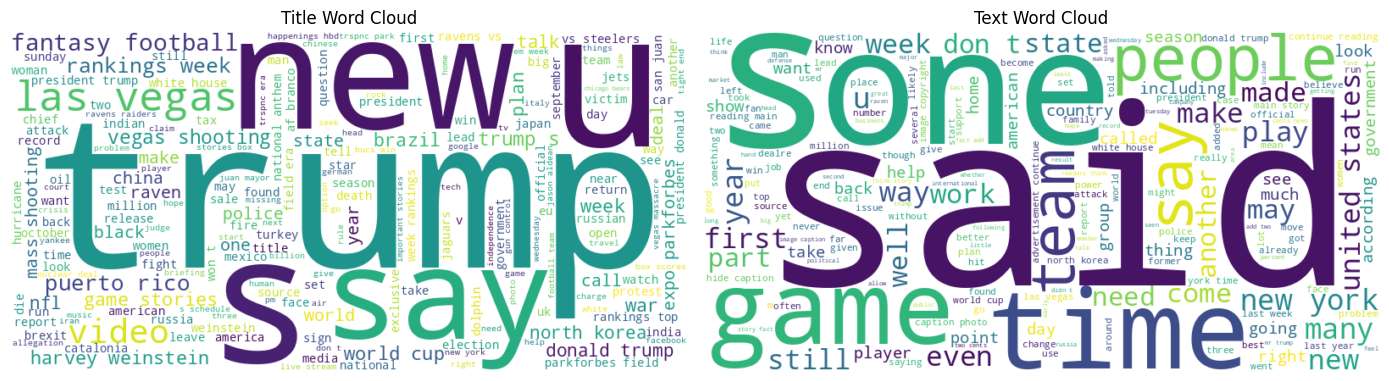

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for titles and text
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(title_words))
text_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text_words))

# Display the word clouds
plt.figure(figsize=(14, 7))

# Title word cloud
plt.subplot(1, 2, 1)
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Title Word Cloud')

# Text word cloud
plt.subplot(1, 2, 2)
plt.imshow(text_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Text Word Cloud')

plt.tight_layout()
plt.show()


#Class Distribution

Visualize the balance or imbalance between classes (Fake/Real).

<ipython-input-19-2ddd221002b3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')


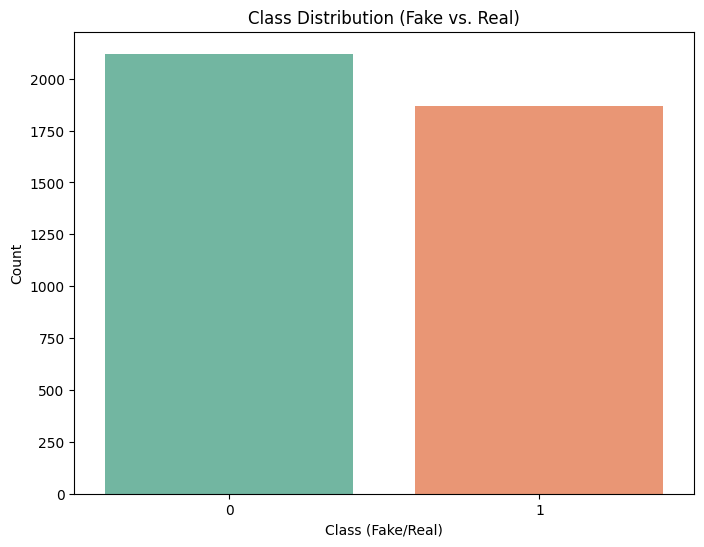

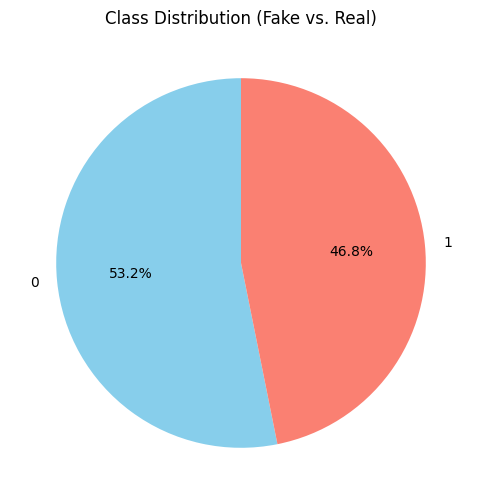

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the unique values in the 'label' column (assuming 'label' column indicates Fake/Real)
class_counts = data_cleaned['Label'].value_counts()

# Plotting the class distribution using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')
plt.title('Class Distribution (Fake vs. Real)')
plt.xlabel('Class (Fake/Real)')
plt.ylabel('Count')
plt.show()

# Plotting the class distribution using a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Class Distribution (Fake vs. Real)')
plt.show()


#Feature Relationships

Examine relationships between features and target labels.

Box Plot: Relationship between Text Length and Label

<ipython-input-20-c0ba10c1890e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='body_length', data=data_cleaned, palette='Set2')


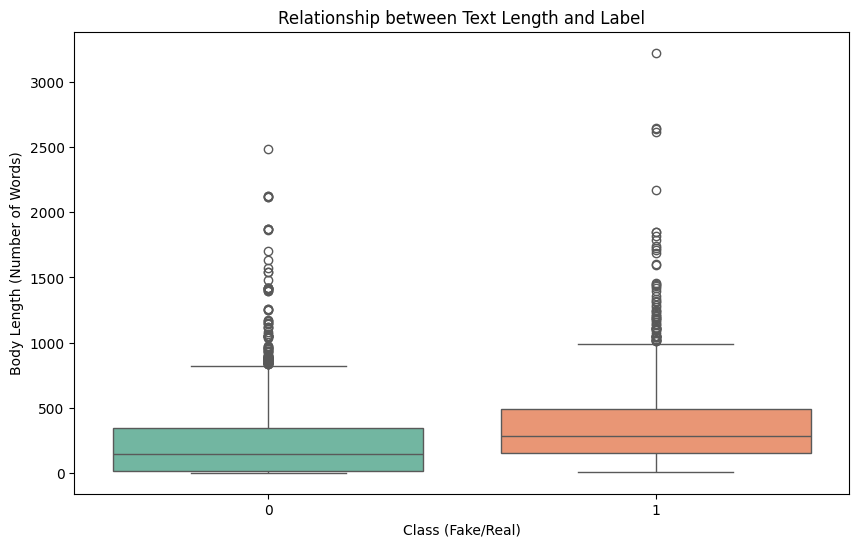

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to examine the relationship between text length and label (Fake/Real)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='body_length', data=data_cleaned, palette='Set2')
plt.title('Relationship between Text Length and Label')
plt.xlabel('Class (Fake/Real)')
plt.ylabel('Body Length (Number of Words)')
plt.show()


Bar Plot: Average Title Length by Label

<ipython-input-21-1688ab63e5a6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Label', y='headline_length', data=avg_headline_length, palette='Set1')


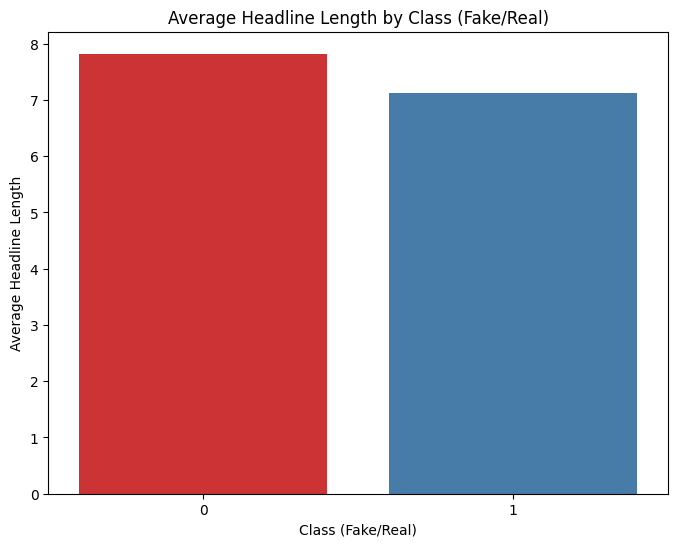

In [ ]:
# Bar plot for average title length per class (Fake/Real)
plt.figure(figsize=(8, 6))
avg_headline_length = data_cleaned.groupby('Label')['headline_length'].mean().reset_index()

sns.barplot(x='Label', y='headline_length', data=avg_headline_length, palette='Set1')
plt.title('Average Headline Length by Class (Fake/Real)')
plt.xlabel('Class (Fake/Real)')
plt.ylabel('Average Headline Length')
plt.show()


Scatter Plot: Headline Length vs. Body Length Colored by Label

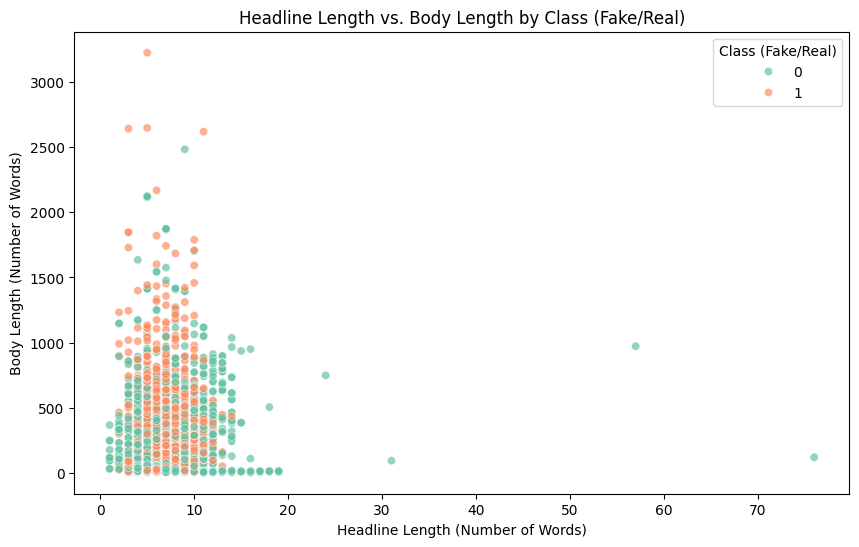

In [ ]:
# Scatter plot for title length vs. text length colored by label (Fake/Real)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='headline_length', y='body_length', hue='Label', data=data_cleaned, palette='Set2', alpha=0.7)
plt.title('Headline Length vs. Body Length by Class (Fake/Real)')
plt.xlabel('Headline Length (Number of Words)')
plt.ylabel('Body Length (Number of Words)')
plt.legend(title='Class (Fake/Real)')
plt.show()


#**Hybrid Feature Extraction**

# TF-IDF Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
tfidf_features = tfidf_vectorizer.fit_transform(data_cleaned['cleaned_body'])

# Convert to DataFrame for easier manipulation
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


#N-grams (Word/Character N-grams)

In [ ]:
# Initialize a Word N-grams (2-grams) vectorizer
ngram_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)  # Word-level N-grams
ngram_features = ngram_vectorizer.fit_transform(data_cleaned['cleaned_body'])

# Convert to DataFrame
ngram_df = pd.DataFrame(ngram_features.toarray(), columns=ngram_vectorizer.get_feature_names_out())


#Word Embeddings (Word2Vec)


In [ ]:
import gensim
from gensim.models import Word2Vec
import numpy as np

# Prepare the data for Word2Vec model
sentences = [body.split() for body in data_cleaned['cleaned_body']]

# Train a Word2Vec model (you can load pre-trained as well)
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Create a function to get average word embeddings for each text
def get_avg_word2vec(body, model):
    words = body.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Apply the function to the dataset
word2vec_features = data_cleaned['cleaned_body'].apply(lambda x: get_avg_word2vec(x, word2vec_model))

# Convert to DataFrame
word2vec_df = pd.DataFrame(word2vec_features.tolist(), columns=[f'w2v_{i}' for i in range(100)])


#Combining the Features

In [ ]:
# Combine TF-IDF, N-grams, and Word2Vec features
combined_features = pd.concat([tfidf_df, ngram_df, word2vec_df], axis=1)

# Include other relevant features like title length or text length if needed
combined_features['headline_length'] = data_cleaned['headline_length']
combined_features['body_length'] = data_cleaned['body_length']

print(combined_features.head())


    10  100  1000  10000  100000  101  10th   11   12   13  ...    w2v_92  \
0  0.0  0.0   0.0    0.0     0.0  0.0   0.0  0.0  0.0  0.0  ...  0.450101   
1  0.0  0.0   0.0    0.0     0.0  0.0   0.0  0.0  0.0  0.0  ...  0.146882   
2  0.0  0.0   0.0    0.0     0.0  0.0   0.0  0.0  0.0  0.0  ...  0.419801   
3  0.0  0.0   0.0    0.0     0.0  0.0   0.0  0.0  0.0  0.0  ...  0.198661   
4  0.0  0.0   0.0    0.0     0.0  0.0   0.0  0.0  0.0  0.0  ...  0.384147   

     w2v_93    w2v_94    w2v_95    w2v_96    w2v_97    w2v_98    w2v_99  \
0  0.288895  0.672681  0.226656  0.392159 -0.646229  0.334832  0.302074   
1  0.083339  0.645948  0.311382  0.301239 -0.498453  0.202669  0.149871   
2  0.308764  0.675385  0.317821  0.376240 -0.561599  0.432154  0.410664   
3  0.080859  0.873660  0.500604  0.170880 -0.819664 -0.050701  0.102965   
4 -0.158853  0.904452  0.386256  0.389747 -0.178844  0.499269  0.254403   

   headline_length  body_length  
0              7.0        605.0  
1              9.0

#Visualizing Extracted Features

PCA (Principal Component Analysis) for TF-IDF or N-grams Features

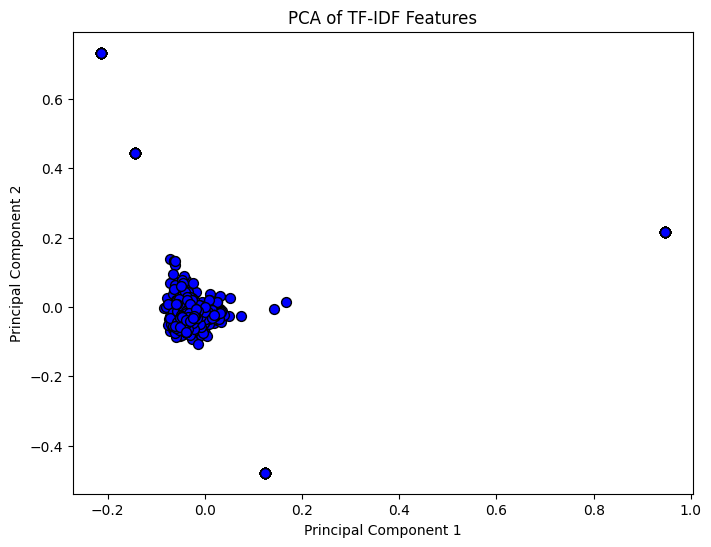

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA on TF-IDF features (or any other text-based features)
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_df)

# Plot the two principal components
plt.figure(figsize=(8, 6))
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA of TF-IDF Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


t-SNE for Word Embeddings

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


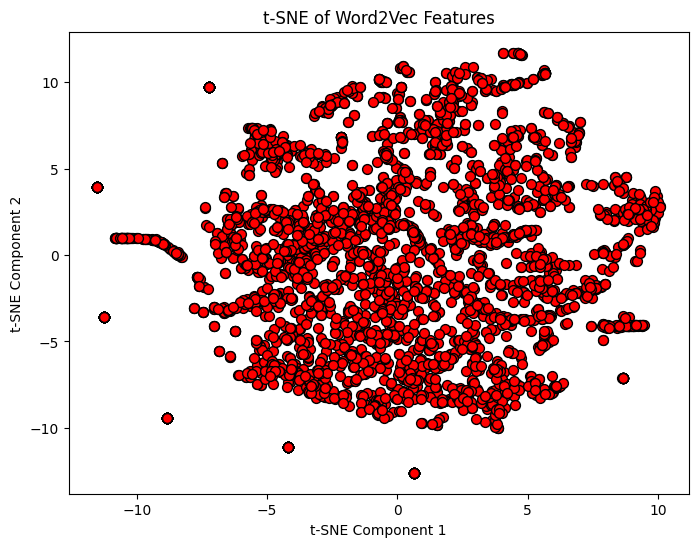

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE on Word2Vec features
tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
word2vec_tsne = tsne.fit_transform(word2vec_df)

# Plot the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(word2vec_tsne[:, 0], word2vec_tsne[:, 1], c='red', edgecolor='k', s=50)
plt.title('t-SNE of Word2Vec Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


Heatmap of Feature Correlations


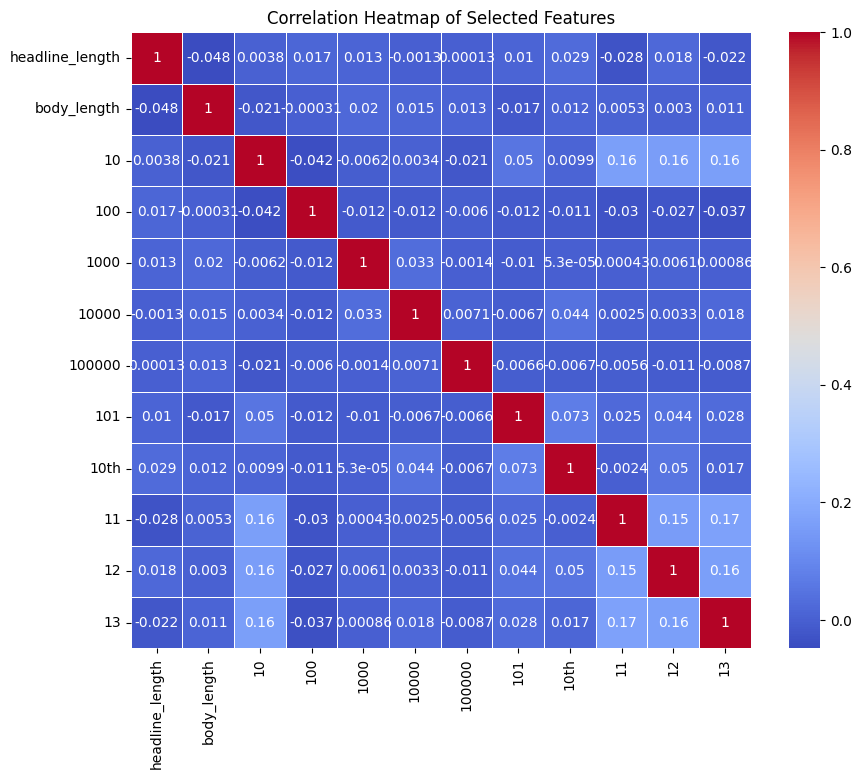

In [ ]:
import seaborn as sns

# Select a few numerical features for correlation heatmap
subset_features = pd.concat([combined_features[['headline_length', 'body_length']], tfidf_df.iloc[:, :10]], axis=1)

# Calculate the correlation matrix
corr_matrix = subset_features.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


Word Embedding Relationship Visualization

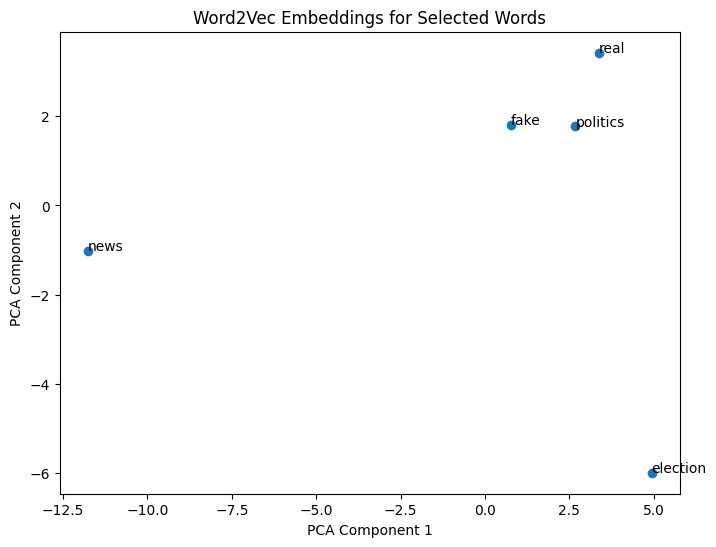

In [ ]:
# Take a few words to visualize their embeddings
words_to_visualize = ['fake', 'news', 'real', 'politics', 'election']

# Get their embeddings from the Word2Vec model
word_vectors = np.array([word2vec_model.wv[word] for word in words_to_visualize])

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

# Plot the word embeddings
plt.figure(figsize=(8, 6))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1])

# Annotate the points with word labels
for i, word in enumerate(words_to_visualize):
    plt.annotate(word, xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]))

plt.title('Word2Vec Embeddings for Selected Words')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# **Feature Engineering**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Example data
documents = ["sample text", "another sample text"]

# Step 1: Create TF-IDF features
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(documents)

# Step 2: Normalize features
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_tfidf.toarray())


In [ ]:
print(X_scaled)

[[0.         6.87988027 6.87988027]
 [2.         4.87988027 4.87988027]]


# Train - Test Split

In [ ]:
#from sklearn.model_selection import train_test_split

# Assume 'combined_features' contains all features and 'y' contains the labels
#X = combined_features  # All the extracted features
#y = data_cleaned['label']  # The target labels

# Perform the split (80% training, 20% testing)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now use X_train, X_test, y_train, y_test for model training
# Fit and transform the training data, and transform the test data
#X_train_tfidf = vectorizer.fit_transform(X_train)
#X_test_tfidf = vectorizer.transform(X_test)

# Now X_train_tfidf and X_test_tfidf are ready for use in model training
#print("Training data shape:", X_train_tfidf.shape)
#print("Testing data shape:", X_test_tfidf.shape)

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Split the data into training and testing sets

# We'll split based on 'cleaned_text' column
X = data_cleaned['cleaned_body']  # This is the cleaned text data (body/text)
y = data_cleaned['Label']  # Labels (assumed to be in the 'label' column)

# Perform the split (80% training data, 20% testing data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Convert the text into numerical features using TF-IDF

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for efficiency

# Fit and transform the training data, and transform the test data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Now X_train_tfidf and X_test_tfidf are ready for use in model training
print("Training data shape:", X_train_tfidf.shape)
print("Testing data shape:", X_test_tfidf.shape)


Training data shape: (3190, 5000)
Testing data shape: (798, 5000)


# **ML Algorithms**

#Logistic Regression

Logistic Regression Accuracy: 96.37%
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       450
           1       0.95      0.97      0.96       348

    accuracy                           0.96       798
   macro avg       0.96      0.96      0.96       798
weighted avg       0.96      0.96      0.96       798



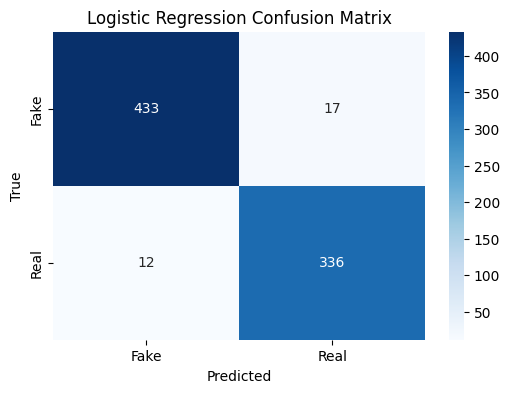

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Logistic Regression model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_lr = model_lr.predict(X_test_tfidf)

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred_lr))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Assuming the labels are 'Fake' and 'Real', adjust if different
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# SVM

SVM Accuracy: 98.12%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       450
           1       0.98      0.98      0.98       348

    accuracy                           0.98       798
   macro avg       0.98      0.98      0.98       798
weighted avg       0.98      0.98      0.98       798



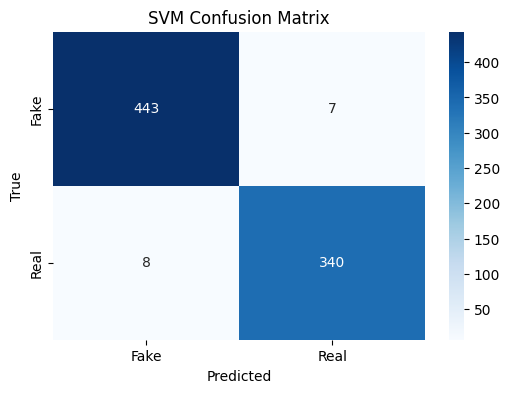

In [ ]:
from sklearn.svm import SVC

# Train the SVM model
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_svm = model_svm.predict(X_test_tfidf)

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#Naive Bayes

Naive Bayes Accuracy: 90.98%
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       450
           1       0.86      0.95      0.90       348

    accuracy                           0.91       798
   macro avg       0.91      0.91      0.91       798
weighted avg       0.92      0.91      0.91       798



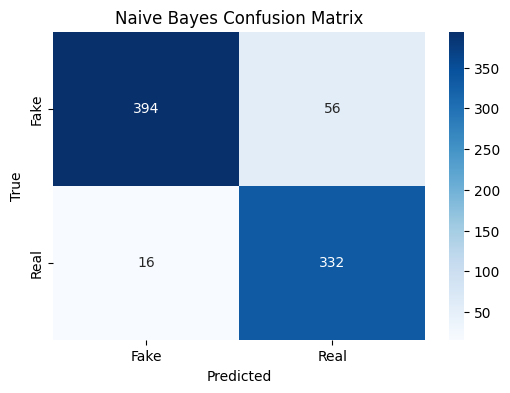

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Train the Naive Bayes model
model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_nb = model_nb.predict(X_test_tfidf)

# Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred_nb))

# Confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#Random Forest

Random Forest Accuracy: 97.62%
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       450
           1       0.95      0.99      0.97       348

    accuracy                           0.98       798
   macro avg       0.97      0.98      0.98       798
weighted avg       0.98      0.98      0.98       798



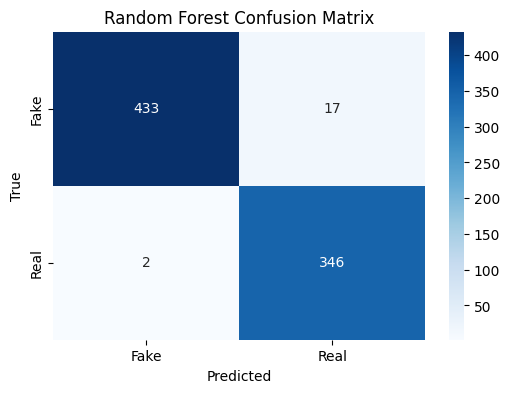

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Added random_state for reproducibility
model_rf.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_rf = model_rf.predict(X_test_tfidf)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#XGBoost

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:28:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 97.37%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       450
           1       0.97      0.97      0.97       348

    accuracy                           0.97       798
   macro avg       0.97      0.97      0.97       798
weighted avg       0.97      0.97      0.97       798



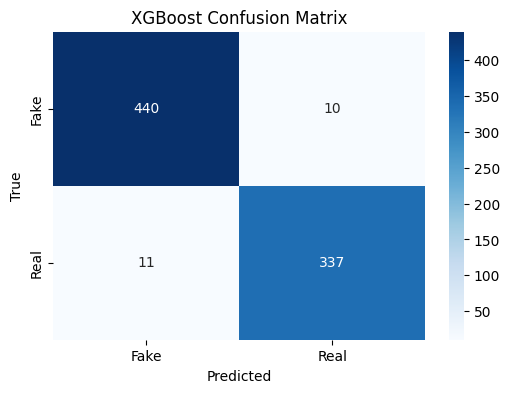

In [ ]:
import xgboost as xgb

# Train the XGBoost model
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_xgb = model_xgb.predict(X_test_tfidf)

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# LightGBM

[LightGBM] [Info] Number of positive: 1520, number of negative: 1670
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.275323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 149817
[LightGBM] [Info] Number of data points in the train set: 3190, number of used features: 4636
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.476489 -> initscore=-0.094113
[LightGBM] [Info] Start training from score -0.094113
LightGBM Accuracy: 97.99%
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       450
           1       0.97      0.98      0.98       348

    accuracy                           0.98       798
   macro avg       0.98      0.98      0.98       798
weighted avg       0.98      0.98      0.98       798



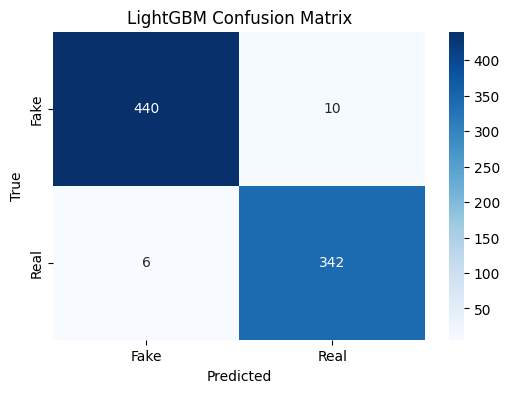

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the LightGBM model
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_lgb = model_lgb.predict(X_test_tfidf)

# Accuracy
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Accuracy: {accuracy_lgb * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred_lgb))

# Confusion matrix
cm_lgb = confusion_matrix(y_test, y_pred_lgb)

# Plotting confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('LightGBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# SVD

Confusion Matrix:
 [[429  21]
 [ 20 328]]


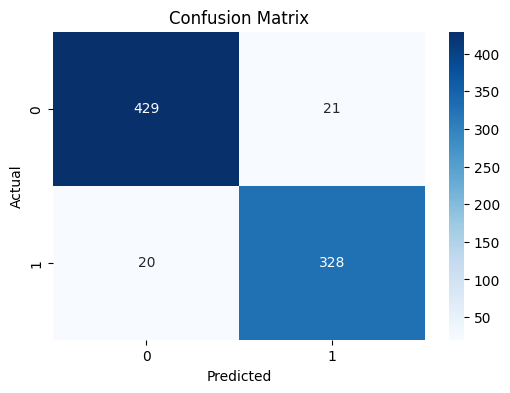

SVD Accuracy: 97.99%

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       450
           1       0.94      0.94      0.94       348

    accuracy                           0.95       798
   macro avg       0.95      0.95      0.95       798
weighted avg       0.95      0.95      0.95       798



In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Split the data into training and testing sets
X =  data_cleaned['cleaned_body']  # Using the 'Body' column for text data
y =  data_cleaned['Label']  # Labels from the 'Label' column

# Perform the split (80% training data, 20% testing data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Convert the text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for efficiency
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 3: Apply SVD (dimensionality reduction)
svd = TruncatedSVD(n_components=100)  # Reducing to 100 components (you can adjust this)
X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd = svd.transform(X_test_tfidf)

# Step 4: Train a Logistic Regression model
classifier = LogisticRegression()
classifier.fit(X_train_svd, y_train)

# Step 5: Predict on the test set
y_pred = classifier.predict(X_test_svd)

# Step 6: Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy
accuracy_svd = accuracy_score(y_test, y_pred_lgb)
print(f"SVD Accuracy: {accuracy_svd * 100:.2f}%")

# Step 7: Classification report (precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


#Decision Tree

Decision Tree Accuracy: 93.86%
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       450
           1       0.93      0.93      0.93       348

    accuracy                           0.94       798
   macro avg       0.94      0.94      0.94       798
weighted avg       0.94      0.94      0.94       798



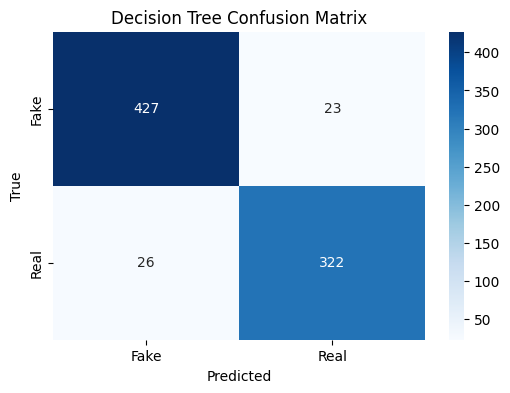

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Decision Tree model
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_dt = model_dt.predict(X_test_tfidf)

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred_dt))

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plotting confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#Gradient Boosting Machines (GBM)

Gradient Boosting Accuracy: 96.62%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       450
           1       0.97      0.96      0.96       348

    accuracy                           0.97       798
   macro avg       0.97      0.97      0.97       798
weighted avg       0.97      0.97      0.97       798



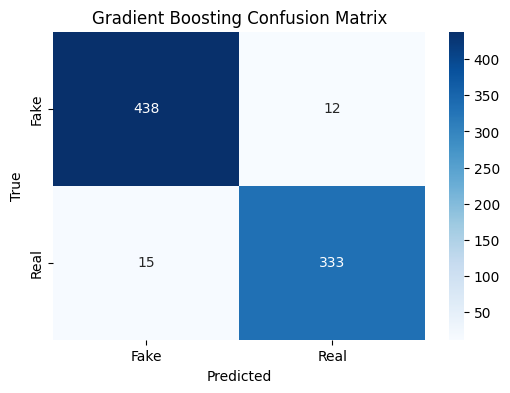

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Gradient Boosting model
model_gbm = GradientBoostingClassifier()
model_gbm.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_gbm = model_gbm.predict(X_test_tfidf)

# Accuracy
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(f"Gradient Boosting Accuracy: {accuracy_gbm * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred_gbm))

# Confusion matrix
cm_gbm = confusion_matrix(y_test, y_pred_gbm)

# Plotting confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_gbm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#Comparision

Logistic Regression Accuracy: 96.37%
SVM Accuracy: 98.12%
Naive Bayes Accuracy: 90.98%
Random Forest Accuracy: 97.62%
XGBoost Accuracy: 97.37%
Decision Tree Accuracy: 93.86%
Gradient Boosting Accuracy: 96.62%
LightGBM Accuracy: 97.99%
SVD Accuracy: 97.99%


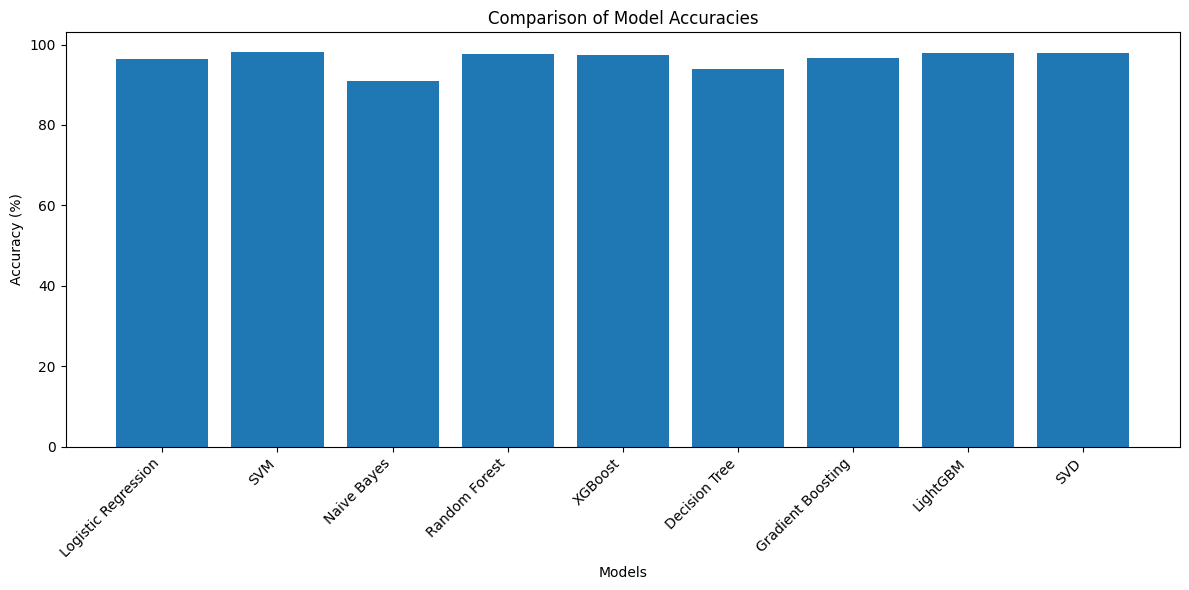

In [ ]:
# prompt: COMPARE ALL MODELS ACCURACY UN PERCENTAGE WITH GRAPHS AND PRINT ACCURARIES

accuracies = {
    "Logistic Regression": accuracy_lr,
    "SVM": accuracy_svm,
    "Naive Bayes": accuracy_nb,
    "Random Forest": accuracy_rf,
    "XGBoost": accuracy_xgb,
    "Decision Tree": accuracy_dt,
    "Gradient Boosting": accuracy_gbm,
    "LightGBM": accuracy_lgb,
    "SVD": accuracy_svd
}

# Print Accuracies
for model_name, accuracy in accuracies.items():
  print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")


# Create a bar chart to compare model accuracies
plt.figure(figsize=(12, 6))
plt.bar(accuracies.keys(), [acc * 100 for acc in accuracies.values()])
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Model Accuracies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# **Testing**

In [ ]:
pip install pandas scikit-learn xgboost lightgbm

In [ ]:
pip install lightgbm pandas scikit-learn xgboost matplotlib

[LightGBM] [Info] Number of positive: 1520, number of negative: 1670
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25499
[LightGBM] [Info] Number of data points in the train set: 3190, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.476489 -> initscore=-0.094113
[LightGBM] [Info] Start training from score -0.094113
Metrics for Logistic Regression:
Accuracy: 0.9411027568922306
Precision: 0.9411247405563768
Recall: 0.9411027568922306
F1 Score: 0.9411122503379273


Metrics for Random Forest:
Accuracy: 0.956140350877193
Precision: 0.9565029019126448
Recall: 0.956140350877193
F1 Score: 0.9561987927049517


Metrics for Decision Tree:
Accuracy: 0.9172932330827067
Precision: 0.9172932330827067
Recall: 0.9172932330827067
F1 Score: 0.9172932330827067


Metrics for Gradient Boosting:
Accuracy: 0.9486215538847118
Precision: 

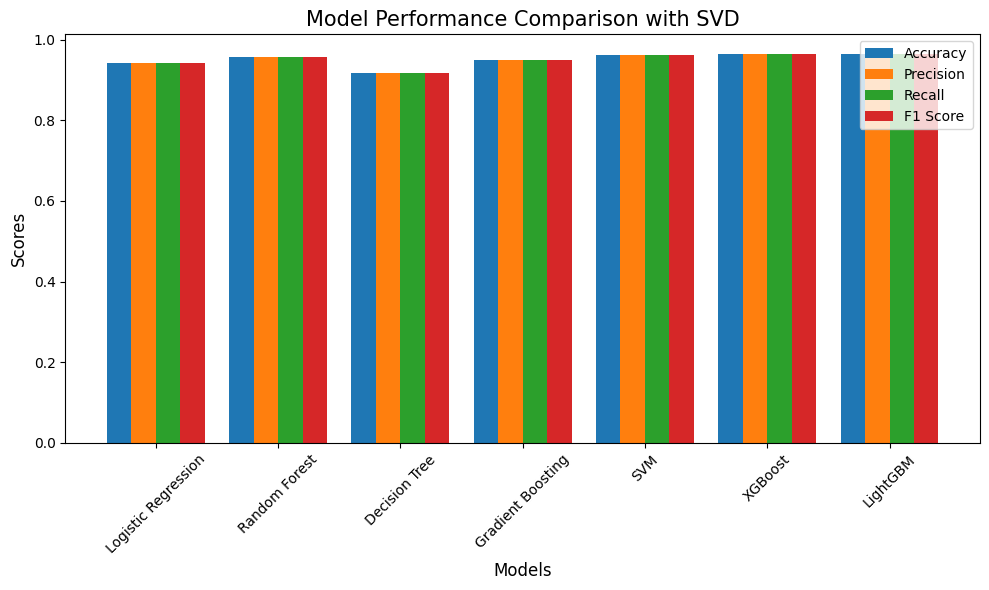

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load your dataset
file_path = '/content/cleaned_dataset.csv'
df = pd.read_csv(file_path)

# Extract features (text) and labels
X = df['cleaned_body']  # Use cleaned_body or cleaned_headline based on your preference
y = df['Label']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF to convert the text data into numerical vectors
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as necessary
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Apply SVD for dimensionality reduction
svd = TruncatedSVD(n_components=100)  # You can adjust the number of components
X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd = svd.transform(X_test_tfidf)

# Train and evaluate all models

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_svd, y_train)
lr_preds = lr.predict(X_test_svd)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_svd, y_train)
rf_preds = rf.predict(X_test_svd)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_svd, y_train)
dt_preds = dt.predict(X_test_svd)

# Gradient Boosting
gbm = GradientBoostingClassifier()
gbm.fit(X_train_svd, y_train)
gbm_preds = gbm.predict(X_test_svd)

# Support Vector Machine
svm = SVC()
svm.fit(X_train_svd, y_train)
svm_preds = svm.predict(X_test_svd)

# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_svd, y_train)
xgb_preds = xgb_model.predict(X_test_svd)

# LightGBM
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train_svd, y_train)
lgbm_preds = lgbm.predict(X_test_svd)

# Function to compute and return performance metrics
def evaluate_model(y_test, y_preds):
    return {
        'Accuracy': accuracy_score(y_test, y_preds),
        'Precision': precision_score(y_test, y_preds, average='weighted'),
        'Recall': recall_score(y_test, y_preds, average='weighted'),
        'F1 Score': f1_score(y_test, y_preds, average='weighted')
    }

# Evaluate all models
model_metrics = {
    'Logistic Regression': evaluate_model(y_test, lr_preds),
    'Random Forest': evaluate_model(y_test, rf_preds),
    'Decision Tree': evaluate_model(y_test, dt_preds),
    'Gradient Boosting': evaluate_model(y_test, gbm_preds),
    'SVM': evaluate_model(y_test, svm_preds),
    'XGBoost': evaluate_model(y_test, xgb_preds),
    'LightGBM': evaluate_model(y_test, lgbm_preds)
}

# Print model metrics
for model_name, metrics in model_metrics.items():
    print(f"Metrics for {model_name}:")
    for metric, score in metrics.items():
        print(f"{metric}: {score}")
    print("\n")

# Plot the results
accuracy = [metrics['Accuracy'] for metrics in model_metrics.values()]
precision = [metrics['Precision'] for metrics in model_metrics.values()]
recall = [metrics['Recall'] for metrics in model_metrics.values()]
f1 = [metrics['F1 Score'] for metrics in model_metrics.values()]
model_names = list(model_metrics.keys())

# Plotting metrics
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(model_names))

# Accuracy bar
plt.bar(index, accuracy, bar_width, label='Accuracy')

# Precision bar
plt.bar([i + bar_width for i in index], precision, bar_width, label='Precision')

# Recall bar
plt.bar([i + 2 * bar_width for i in index], recall, bar_width, label='Recall')

# F1 Score bar
plt.bar([i + 3 * bar_width for i in index], f1, bar_width, label='F1 Score')

# Add labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Model Performance Comparison with SVD', fontsize=15)
plt.xticks([i + 1.5 * bar_width for i in index], model_names, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
